# Artificial Neural Networks with Python

**Objectives**

- Implement basic Neural Network from Scratch with Python
- Implement Regression with `pytorch`
- Implement Classification with `pytorch`

### A Basic Network

To begin, we focus on a simple example of an Artificial Neural Network.  Below is an image of the biological motivation:

![](https://upload.wikimedia.org/wikipedia/commons/4/44/Neuron3.png)




**The Artificial Representation**

![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Artificial_neural_network.svg/269px-Artificial_neural_network.svg.png)

### Simple Hard Activation Function

$${\displaystyle f(\mathbf {x} )={\begin{cases}1&{\text{if }}\ \mathbf {w} \cdot \mathbf {x} +b>0,\\0&{\text{otherwise}}\end{cases}}}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [2]:
#make some random data
X = np.random.randint(-10, 10, size = 10).reshape(5, 2)
y = np.array([1, 1, 1, 0, 0])

In [3]:
#look at X
X

array([[  9,   3],
       [  3,  -3],
       [ -2, -10],
       [-10,   5],
       [ -1,   3]])

In [4]:
#create one layer of weights
weights = np.random.random(size = 2)

In [5]:
#look at weights
weights

array([0.06989324, 0.98818475])

In [6]:
#weighted sum of inputs
X@weights

array([  3.59359341,  -2.75487452, -10.02163396,   4.24199134,
         2.894661  ])

In [9]:
#define activation
def activation(x):
    return np.where(x > 0, 1, 0)

In [10]:
#pass through activation
activation(X@weights)

array([1, 0, 0, 1, 1])

In [11]:
y = np.array([1, 1, 0, 1, 0])

In [13]:
(y - activation(X@weights))**2

array([0, 1, 0, 0, 1])

### Introduction to PyTorch

![](https://upload.wikimedia.org/wikipedia/commons/9/96/Pytorch_logo.png)

In [14]:
#define vectors w, b
w = torch.tensor(3.0, requires_grad = True)
b = torch.tensor(1.0, requires_grad = True)

In [15]:
#look at w, b
w

tensor(3., requires_grad=True)

In [16]:
b

tensor(1., requires_grad=True)

In [17]:
#define feed forward
def ffwd(x):
    return w*x + b

In [19]:
#pass input data 
x = torch.tensor([[5], [2]])
ffwd(x)

tensor([[16.],
        [ 7.]], grad_fn=<AddBackward0>)

#### The Linear Model 

In [20]:
#our template for network
torch.manual_seed(3)
model = nn.Linear(in_features = 1, out_features = 1)

In [21]:
model.bias, model.weight

(Parameter containing:
 tensor([-0.7889], requires_grad=True),
 Parameter containing:
 tensor([[-0.9915]], requires_grad=True))

In [24]:
#feed data through model
x = torch.tensor([3.0])
model(x)

tensor([-3.7633], grad_fn=<AddBackward0>)

In [25]:
#write a class to do this
class LinearRegression(nn.Module):
    
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)   

In [26]:
#test the class
lr = LinearRegression(1, 1)

In [28]:
#look at parameters of model
list(lr.parameters())

[Parameter containing:
 tensor([[-0.4283]], requires_grad=True),
 Parameter containing:
 tensor([-0.9461], requires_grad=True)]

In [29]:
#add a feed forward method
#write a class to do this
class LinearRegression(nn.Module):
    
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def ffwd(self, x):
        return self.linear(x)

In [30]:
#instantiate
lr = LinearRegression(1, 1)

In [31]:
#create input
x = torch.tensor([4.3])

In [32]:
#feed it forward
lr.ffwd(x)

tensor([-1.1239], grad_fn=<AddBackward0>)

#### A Simple Dataset

In [33]:
#create X, y
X = torch.randn(100, 1)*10
y = X + torch.randn(100, 1)*3

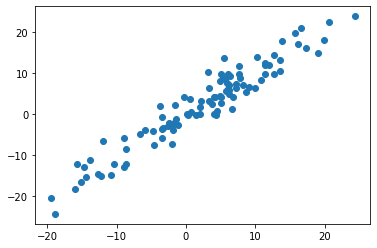

In [34]:
#plot these
plt.scatter(X, y)

In [35]:
#get weight and biases
[w, b] = lr.parameters()

In [36]:
#function to get parameters
def get_parameters():
    return w[0][0].item(), b[0].item()

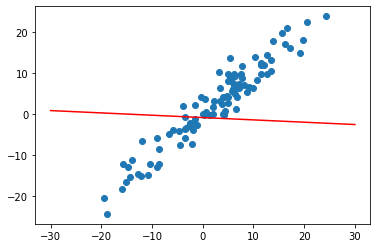

In [37]:
#plot the model fit
w1, b1 = get_parameters()
x1 = np.array([-30,30])
y1 = w1*x1 + b1
plt.plot(x1, y1, '-r')
plt.scatter(X, y)

### Improving the Fit

$$(y - (wx + b))^2$$

Take for example the point $(-3, 3)$.

$$\text{Loss} = (3 - (w(-3) + b))^2$$

Choose $w$ to minimize error.

$$w_1 = w_0 - \alpha f'(w)$$

In [39]:
w0 = -1.5
b = 1
alpha = 0.01

In [40]:
loss = (3 - (-1.5*-3 + 1))**2

In [41]:
d_loss = 2*(3 + 3*w0)*3

In [42]:
w1 = w0 - alpha*d_loss

In [43]:
w1

-1.41

### Implementation with PyTorch

In [44]:
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def ffwd(self, x):
        return self.linear(x)

In [45]:
torch.manual_seed(1)
X = torch.randn(100, 1)*10

y = X + 3*torch.randn(100, 1)

In [46]:
model = LinearRegression(1, 1)

In [47]:
#loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [48]:
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.ffwd(X)
    loss = criterion(y_pred, y)
    if i%9 == 0:
        print(f'epoch {i}, loss: {loss.item()}')
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch 0, loss: 10.461552619934082
epoch 9, loss: 10.308244705200195
epoch 18, loss: 10.20394515991211
epoch 27, loss: 10.13296127319336
epoch 36, loss: 10.084636688232422
epoch 45, loss: 10.051724433898926
epoch 54, loss: 10.029300689697266
epoch 63, loss: 10.014020919799805
epoch 72, loss: 10.003602027893066
epoch 81, loss: 9.996493339538574
epoch 90, loss: 9.991643905639648
epoch 99, loss: 9.988332748413086


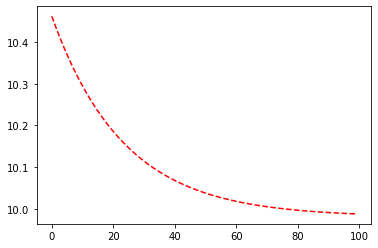

In [49]:
plt.plot(range(epochs), losses, '--r')

In [50]:
def plot_model_fit():
    w1, b1 = get_parameters()
    x1 = np.array([-30,30])
    y1 = w1*x1 + b1
    plt.plot(x1, y1, '-r')
    plt.scatter(X, y)

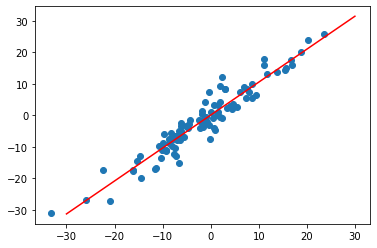

In [51]:
w, b = model.parameters()
plot_model_fit()

In [55]:
x1

array([-30,  30])

In [60]:
sum((y - (w1*X + b1))**2)/len(X)

tensor([601.0170])

In [62]:
sum((y - y.mean())**2)/len(X)

tensor([115.1114])